In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from lab_coffee_utils import load_coffee_data

In [2]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


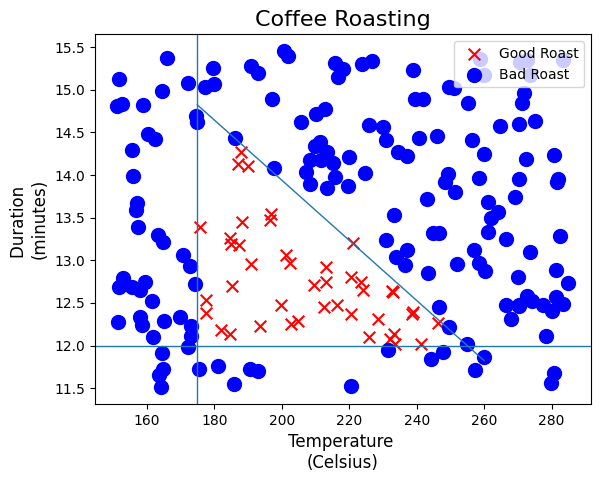

In [3]:
Y_draw=Y.reshape(-1)
fig,ax=plt.subplots(1,1,)
ax.scatter(X[Y_draw==1,0],X[Y_draw==1,1], s=70, marker='x', c='red', label="Good Roast" )
ax.scatter(X[Y_draw==0,0],X[Y_draw==0,1], s=100, marker='o',c='b', facecolors='none',
           linewidth=1,  label="Bad Roast")
tr = np.linspace(175,260,50)
ax.plot(tr, (-3/85) * tr + 21,linewidth=1)
ax.axhline(y=12,linewidth=1)
ax.axvline(x=175,linewidth=1)
ax.set_title(f"Coffee Roasting", size=16)
ax.set_xlabel("Temperature \n(Celsius)",size=12)
ax.set_ylabel("Duration \n(minutes)",size=12)
ax.legend(loc='upper right')
plt.show()

In [4]:
print(f"max,min temperature ={np.max(X[:,0]):0.2f} , {np.min(X[:,0]):0.2f}")
print(f"max,min Duration ={np.max(X[:,1]):0.2f} , {np.min(X[:,1]):0.2f}")
print("After Normalization")
norm_l=tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
Xn=norm_l(X)
print(f"max,min temperature ={np.max(Xn[:,0]):0.2f} , {np.min(Xn[:,0]):0.2f}")
print(f"max,min Duration ={np.max(Xn[:,1]):0.2f} , {np.min(Xn[:,1]):0.2f}")


max,min temperature =284.99 , 151.32
max,min Duration =15.45 , 11.51
After Normalization

max,min temperature =1.66 , -1.69
max,min Duration =1.79 , -1.70


In [5]:
def g(z):
    return(1/(1+np.exp(-z)))

In [6]:
# vectorized implementation
def dense(A_in,W,b):
    units=W.shape[1]
    A_out=np.zeros(units)
    z=np.matmul(A_in,W)+b
    A_out=g(z)
    return A_out

In [15]:
def sequential(Xn,W1,b1,W2,b2):
    a1=dense(Xn,W1,b1)
    a2=dense(a1,W2,b2)
    return a2

In [16]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [17]:
def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = sequential(X[i], W1, b1, W2, b2)
    return(p)

In [18]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_l(X_tst)  # remember to normalize
predictions = my_predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

In [19]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]
